<a href="https://colab.research.google.com/github/Alex-So-Ma/Fisica_Computacional_2023-1/blob/main/Tarea_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tarea 4
####Física Computacional
####Alejandro Soto Malpica


##1. Polinomios de Legendre

Función que grafica los primeros n polinomios de Legendre y sus derivadas.

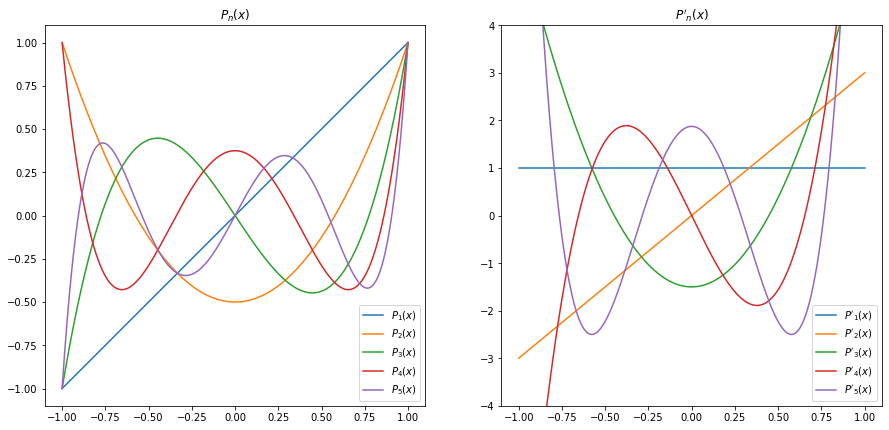

In [ ]:
def leg(x,n):
  """
  Da el valor del polinomio de Legendre n evaluado en x
  """
  import numpy as np

  #Creamos un array donde guardaremos los valores de los polinomios de Legendre evaluados en x
  j=np.zeros((n+2),float)
  j[0]=1
  j[1]=x

  if n>1:
    #Con un ciclo for y la relación de recurrencia de Bonnet calculamos los valores de los polinomios de Legendre siguientes a 1
    for k in range(1,n):
      j[k+1]=((2*k+1)/(k+1))*x*j[k]-(k/(k+1))*j[k-1]

  #Creamos un array donde guardaremos los valores de las derivadas de los polinomios de Legendre evaluadas en x
  i=np.zeros((n+2),float)
  i[0]=0
  i[1]=1

  if n>1:
    #Con un ciclo for y la derivada de la relación de recurrencia de Bonnet calculamos los valores de las derivadas los polinomios de Legendre siguientes a 1
    for k in range(1,n):
      i[k+1]=((2*k+1)/(k+1))*(x*i[k]+j[k])-(k/(k+1))*i[k-1]

  return [j[n],i[n]]

def plotlegendre(n):
  """
  Grafica los primeros n polinomios de Legendre y sus derivadas.
  """
  import numpy as np
  import matplotlib.pyplot as plt

  #Creamos un array de las x a evaluar
  x=np.linspace(-1,1,1000)

  #Creamos dos array que van a guardar los polinomios y sus derivadas evalaudos en x
  y=np.zeros(len(x),float)
  z=np.zeros(len(x),float)

  #Creamos un array con dos subplots
  fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(15,7))

  for j in range(0,2):
    #En el primer subplot graficamos los polinomios
    if j==0:
      eje1 = ax[j]
      for h in range(1,n+1):
        for i in range(0,len(x)):
          y[i]=leg(x[i],h)[j]
        eje1.plot(x,y,label='$P_{var}(x)$'.format(var=h))
      eje1.title.set_text('$P_n(x)$')
      eje1.legend(loc='lower right')
    #En el segundo subplot graficamos las derivadas de los polinomios
    elif j==1:
      eje2 = ax[j]
      for h in range(1,n+1):
        for i in range(0,len(x)):
          z[i]=leg(x[i],h)[j]
        eje2.plot(x,z,label="$P'_{var}(x)$".format(var=h))
      eje2.set_ylim(-4,4)
      eje2.title.set_text("$P'_n(x)$")
      eje2.legend(loc='lower right')

  plt.show()

plotlegendre(5)

##2. Derivadas exactas y aproximadas

Función que grafica la derivada exacta de una función y dos aproximaciones.

[(None, None), (None, None)]

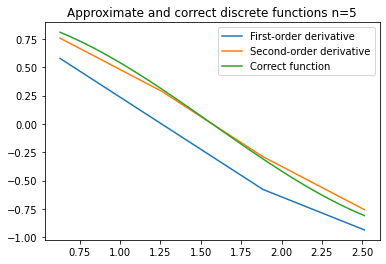

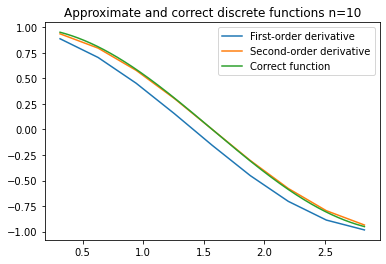

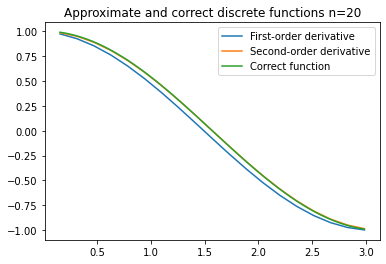

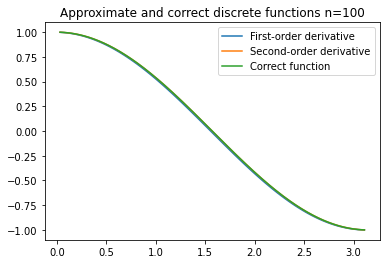

In [ ]:
def derivada_def(f, x, h):
  """
  Aproximación de la derivada de f en x respecto a un valor h
  Usando la definición de derivada: (f(x+h) - f(x))/h
  """
  return (f(x+h) - f(x))/h

def derivada_eq(f, x, h):
  """
  Aproximación de la derivada de f en x respecto a un valor h
  Usando un equivalende a la definición de derivada: (f(x+h) - f(x-h))/(2*h)
  """
  return (f(x+h) - f(x-h))/(2*h)

def derivada_int(formula, f, a, b, n):
  """
  Da la derivada aproximada de f en n+1 puntos equidistantes dentro de un intervalo [a,b]
  Usa la aproximación formula(f,x,h)
  """
  import numpy as np
  h = (b-a)/float(n)
  x = np.linspace(a, b, n+1)
  df = np.zeros(len(x))
  for i in range(1, len(x)-1):
    df[i] = formula(f, x[i], h)


  #Devuelve dos array con los puntos x y sus respectivas derivadas aproximadas df(x)
  return x[1:-1], df[1:-1]

def example(f,df,a,b,n):
  """
  Grafica la derivada exacta df de una función f y dos aproximaciones en un intervalo [a,b] en n+1 puntos.
  """
  import numpy as np
  import matplotlib.pyplot as plt

  #Dos array con los puntos x y sus respectivas derivadas aproximadas df(x), usando la definición
  x, dF = derivada_int(derivada_def,  f, a, b, n)

  #Dos array con los puntos x y sus respectivas derivadas aproximadas df(x), usando la definición equivalente
  x, dS = derivada_int(derivada_eq, f, a, b, n)

  #Dos array con los puntos x y sus respectivas derivadas df(x)
  h = (b-a)/float(n)
  xfine = np.linspace(a+h, b-h, 1001)
  exact=np.zeros(len(xfine))
  for i in range(len(xfine)):
    exact[i] = df(xfine[i])

  #Graficamos
  fig = plt.figure()
  ax = fig.add_subplot()

  ax.title.set_text('Approximate and correct discrete functions n={var}'.format(var=n))
  ax.plot(x,dF,label='First-order derivative')
  ax.legend(loc='upper right')
  ax.plot(x,dS,label='Second-order derivative')
  ax.legend(loc='upper right')
  ax.plot(xfine, exact,label='Correct function')
  ax.legend(loc='upper right')

from math import pi,sin,cos

f=sin
df=cos
a=0
b=pi

[(example(f,df,a,b,5),example(f,df,a,b,10)),(example(f,df,a,b,20),example(f,df,a,b,100))]